In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
import joblib
import numpy as np

In [2]:
train=pd.read_csv(r'data/dataset.csv')
df=train.copy()
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [3]:
df.shape

(22000, 2)

In [4]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [5]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

In [6]:
df['language'].value_counts().count()

22

In [7]:
x,y = df["Text"],df["language"]
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([ 4, 17, 19, ..., 16,  1, 14])

In [8]:
def preprocess(texts):
    cleanText = []
    for text in texts:
        cleaned_text = re.sub(f"[{re.escape(string.punctuation + '–' + string.digits)}]+", " ", text).lower()
        cleanText.append(cleaned_text)
    return cleanText

x = preprocess(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

word_vectorizer = CountVectorizer(max_features=15000)
x_end_word_train = word_vectorizer.fit_transform(x_train).toarray()

with open('word_vectorizer.pkl', 'wb') as file:
    joblib.dump(word_vectorizer, file)

char_vectorizer = CountVectorizer(analyzer='char', max_features=300)

x_end_char_train = char_vectorizer.fit_transform(x_train).toarray()

with open('char_vectorizer.pkl', 'wb') as file:
    joblib.dump(char_vectorizer, file)






In [9]:
counts_train = np.bincount(y_train)
counts_train

counts_train = np.bincount(y_test)
counts_train



array([202, 201, 230, 194, 200, 188, 208, 213, 194, 190, 210, 196, 194,
       196, 197, 213, 199, 179, 198, 196, 199, 203], dtype=int64)

In [10]:
x_combined_train = pd.DataFrame(np.hstack((x_end_word_train, x_end_char_train)))

# Apply the same vectorizers to the testing set
x_end_word_test = word_vectorizer.transform(x_test).toarray()
x_end_char_test = char_vectorizer.transform(x_test).toarray()

x_combined_test = pd.DataFrame(np.hstack((x_end_word_test, x_end_char_test)))

print(x_combined_train.shape)
print(x_combined_test.shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(17600, 15300)
(4400, 15300)
(17600,)
(4400,)


In [11]:
start_time = time.time()


model = BernoulliNB()
model.fit(x_combined_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Naive Bayes model took {} seconds".format(process_time))

Fitting Naive Bayes model took 71.28 seconds


In [12]:
def evalModel(cls,test_set):
    x,y = test_set
    y_pred = cls.predict(x)
    conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y)
    acc = round(accuracy_score(y_pred=y_pred,y_true=y),2) * 100
    
    print(f"Accuracy is {acc}%")
    plt.subplots(figsize=(10,10))
    sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Accuracy is 98.0%


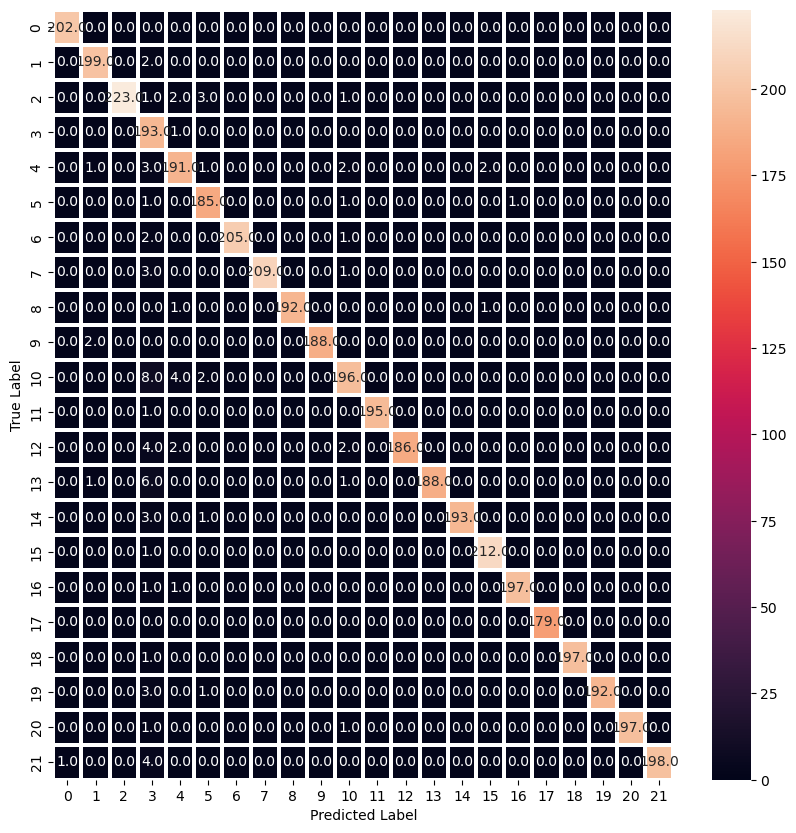

In [13]:
evalModel(model,(x_combined_test,y_test))

In [14]:
encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
# encoder.inverse_transform([1,8])

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

In [15]:
# Load the saved vectorizers
with open('char_vectorizer.pkl', 'rb') as file:
    loaded_char_vectorizer = joblib.load(file)

# Load the saved word vectorizer and vocabulary
with open('word_vectorizer.pkl', 'rb') as file:
    loaded_word_vectorizer = joblib.load(file)

# New data to be predicted
new_data = ["Machine learning is a subfield of artificial intelligence, which is broadly defined as the capability of a machine to imitate intelligent human behavior. Artificial intelligence systems are used to perform complex tasks in a way that is similar to how humans solve problems.",
            "머신러닝은 인공 지능의 하위 분야로, 지능적인 인간 행동을 모방하는 기계의 능력으로 광범위하게 정의됩니다. 인공지능 시스템은 인간이 문제를 해결하는 방식과 유사한 방식으로 복잡한 작업을 수행하는 데 사용됩니다.",
            "机器学习是人工智能的一个子领域，广义上定义为机器模仿人类智能行为的能力。人工智能系统用于以类似于人类解决问题的方式执行复杂的任务",
            "Apparatus eruditionis est subfield intelligentiae artificialis, quae late definitur facultas machinae ad mores humanos intelligentes imitandi. Systemata intelligentiae artificialis adhibita ad multiplicia officia exercenda eo modo, quo homines problemata solvent.",
            "การเรียนรู้ของเครื่องเป็นสาขาย่อยของปัญญาประดิษฐ์ ซึ่งถูกกำหนดอย่างกว้างๆ ว่าเป็นความสามารถของเครื่องจักรในการเลียนแบบพฤติกรรมที่ชาญฉลาดของมนุษย์ ระบบปัญญาประดิษฐ์ถูกใช้เพื่อทำงานที่ซับซ้อนในลักษณะที่คล้ายคลึงกับวิธีที่มนุษย์แก้ปัญหา",]

# Preprocess the new data
cleaned_text = preprocess(new_data)

# Transform the new data
new_data_word = loaded_word_vectorizer.transform(cleaned_text).toarray()
new_data_char = loaded_char_vectorizer.transform(cleaned_text).toarray()

# Combine character and word features horizontally
new_data_combined = pd.DataFrame(np.hstack((new_data_word, new_data_char)))

# Make predictions
predictions = model.predict(new_data_combined)

# Display predictions
for text, prediction in zip(new_data, predictions):
    print(f"Text: {text}\nPredicted Language: {encoder.inverse_transform([prediction])[0]}\n")



Text: Machine learning is a subfield of artificial intelligence, which is broadly defined as the capability of a machine to imitate intelligent human behavior. Artificial intelligence systems are used to perform complex tasks in a way that is similar to how humans solve problems.
Predicted Language: English

Text: 머신러닝은 인공 지능의 하위 분야로, 지능적인 인간 행동을 모방하는 기계의 능력으로 광범위하게 정의됩니다. 인공지능 시스템은 인간이 문제를 해결하는 방식과 유사한 방식으로 복잡한 작업을 수행하는 데 사용됩니다.
Predicted Language: Korean

Text: 机器学习是人工智能的一个子领域，广义上定义为机器模仿人类智能行为的能力。人工智能系统用于以类似于人类解决问题的方式执行复杂的任务
Predicted Language: Chinese

Text: Apparatus eruditionis est subfield intelligentiae artificialis, quae late definitur facultas machinae ad mores humanos intelligentes imitandi. Systemata intelligentiae artificialis adhibita ad multiplicia officia exercenda eo modo, quo homines problemata solvent.
Predicted Language: Latin

Text: การเรียนรู้ของเครื่องเป็นสาขาย่อยของปัญญาประดิษฐ์ ซึ่งถูกกำหนดอย่างกว้างๆ ว่าเป็นความสามารถของเครื่องจักรในการเลียนแบบพฤติกรรมที่ชาญฉลา

In [16]:
joblib.dump(model, 'model.pkl')

['model.pkl']